# EDA And Feature Engineering of Play Store Dataset
1.Problem statement.Today 1.85 million different apps are available to users to download .Android uses have even more from which to choose,with 2.56 million available through the Goggle Play store.These apps have comme to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category,find the App with largest number of installs , the app with largest size etc. <br>
2.Data Collection. <br>
The Data consists of 20 column and 10841 rows.

## Steps we are Going to follow
1. Data Cleaning <br>
2. Exploratory Data Analysis <br>
3. Feature Engeneering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\user\Downloads\Google playstore4.csv")
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape #provide no. of rows and column present in data

(10841, 14)

In [4]:
df.info() #information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10841 non-null  int64  
 1   App             10841 non-null  object 
 2   Category        10841 non-null  object 
 3   Rating          9367 non-null   float64
 4   Reviews         10841 non-null  object 
 5   Size            10841 non-null  object 
 6   Installs        10841 non-null  object 
 7   Type            10840 non-null  object 
 8   Price           10841 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10841 non-null  object 
 11  Last Updated    10841 non-null  object 
 12  Current Ver     10833 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


In [5]:
df.describe() #summary of dataset

,Unnamed: 0,Rating
count,10841.000000,9367.000000
mean,5420.000000,4.193338
std,3129.671468,0.537431
min,0.000000,1.000000
25%,2710.000000,4.000000
50%,5420.000000,4.300000
75%,8130.000000,4.500000
max,10840.000000,19.000000


In [6]:
df.isnull().sum() #missing values

Unnamed: 0           0
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Insigts and Observation

In [7]:
df.head(2)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


## Data cleaning

In [8]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6002,), dtype=object)

In [9]:
#df['Reviews'].astype(int)

In [10]:
df['Reviews'].str.isnumeric().sum() #to check total numeric value

np.int64(10840)

In [11]:
df[~df['Reviews'].str.isnumeric()] #which value is not numeric in reviews

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
df_copy=df.copy() #to make chnges in data first we create its copy


In [13]:
df_copy=df_copy.drop(df_copy.index[10472])

In [14]:
df_copy[~df_copy['Reviews'].str.isnumeric()]


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [15]:
## convert Reviews datatype to int 
df_copy['reviews']=df_copy['Reviews'].astype(int)

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10840 non-null  int64  
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Rating          9366 non-null   float64
 4   Reviews         10840 non-null  object 
 5   Size            10840 non-null  object 
 6   Installs        10840 non-null  object 
 7   Type            10839 non-null  object 
 8   Price           10840 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10840 non-null  object 
 11  Last Updated    10840 non-null  object 
 12  Current Ver     10832 non-null  object 
 13  Android Ver     10838 non-null  object 
 14  reviews         10840 non-null  int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 1.3+ MB


In [17]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [18]:
df_copy['Size'].isnull().sum()

np.int64(0)

In [19]:
df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k','')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size']=df_copy['Size'].astype(float)

In [20]:
df_copy['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [21]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [22]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [23]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,'')

In [24]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [25]:
df_copy['Installs']=df_copy['Installs'].astype(int)
df_copy['Price']=df_copy['Price'].astype(float)

In [26]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10840 non-null  int64  
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Rating          9366 non-null   float64
 4   Reviews         10840 non-null  object 
 5   Size            9145 non-null   float64
 6   Installs        10840 non-null  int64  
 7   Type            10839 non-null  object 
 8   Price           10840 non-null  float64
 9   Content Rating  10840 non-null  object 
 10  Genres          10840 non-null  object 
 11  Last Updated    10840 non-null  object 
 12  Current Ver     10832 non-null  object 
 13  Android Ver     10838 non-null  object 
 14  reviews         10840 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 1.3+ MB


In [27]:
## Handling Last update feature 
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      shape=(1377,), dtype=object)

In [28]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['Month']=df_copy['Last Updated'].dt.month
df_copy['Year']=df_copy['Last Updated'].dt.year

In [29]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      10840 non-null  int64         
 1   App             10840 non-null  object        
 2   Category        10840 non-null  object        
 3   Rating          9366 non-null   float64       
 4   Reviews         10840 non-null  object        
 5   Size            9145 non-null   float64       
 6   Installs        10840 non-null  int64         
 7   Type            10839 non-null  object        
 8   Price           10840 non-null  float64       
 9   Content Rating  10840 non-null  object        
 10  Genres          10840 non-null  object        
 11  Last Updated    10840 non-null  datetime64[ns]
 12  Current Ver     10832 non-null  object        
 13  Android Ver     10838 non-null  object        
 14  reviews         10840 non-null  int64         
 15  Day    

In [30]:
df_copy.to_csv(r'C:\Users\user\OneDrive\Desktop\cleaned files\google_clean.csv')

# EDA

In [31]:
df_copy.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,reviews,Day,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,159,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,967,15,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,87510,1,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,215644,8,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,967,20,6,2018


## Observation
The dataset has duplicate values

In [32]:
df_copy[df_copy.duplicated('App')].shape

(1181, 18)

In [33]:
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')

In [34]:
df_copy.shape

(9659, 18)

# Explore Data

In [35]:
df_copy.drop('Unnamed: 0',axis=1,inplace=True)

In [36]:
numeric_features=[feature for feature in df_copy.columns if df_copy[feature].dtype!='O']
categorical_features=[feature for feature in df_copy.columns if df_copy[feature].dtype=='O']
#print columns

print('We have{} numerical features:{}'.format(len(numeric_features),numeric_features))
print('\nWe have{} categorical features:{}'.format(len(categorical_features),categorical_features))

We have9 numerical features:['Rating', 'Size', 'Installs', 'Price', 'Last Updated', 'reviews', 'Day', 'Month', 'Year']

We have8 categorical features:['App', 'Category', 'Reviews', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


# Feature Information
1. App: Name of the app
2. Category: Category under which the app falls 
3. Rating : Application's rating on Play store
4. Reviews : Number of reviews of the app.
5. size : Size of the App
6. Install: Number of Installs of the App
7. Type: If the App is free or paid
8. Price: Price of the app
9. Content Rating : Appropriate Target Audience of the App 
10. Generes : Genre under which the app falls 
11. Last Updated : date when the app last updated 
12. Current var: currend version if the app
13. Android version : MAx android version required to run the app

In [76]:
# proportion of count data on categorical column
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('------------------------')

App
ROBLOX                                               0.083018
CBS Sports App - Scores, News, Stats & Watch Live    0.073794
Duolingo: Learn Languages Free                       0.064570
ESPN                                                 0.064570
8 Ball Pool                                          0.064570
                                                       ...   
Poker Pro.Fr                                         0.009224
Scoreboard FR                                        0.009224
SnakeBite911 FR                                      0.009224
My FR App                                            0.009224
Infinite Painter                                     0.009224
Name: proportion, Length: 9660, dtype: float64
------------------------
Category
FAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSINESS                4.243151
PRODUCTIVITY            3.911078
PERSONALIZATION         3.615903
CO

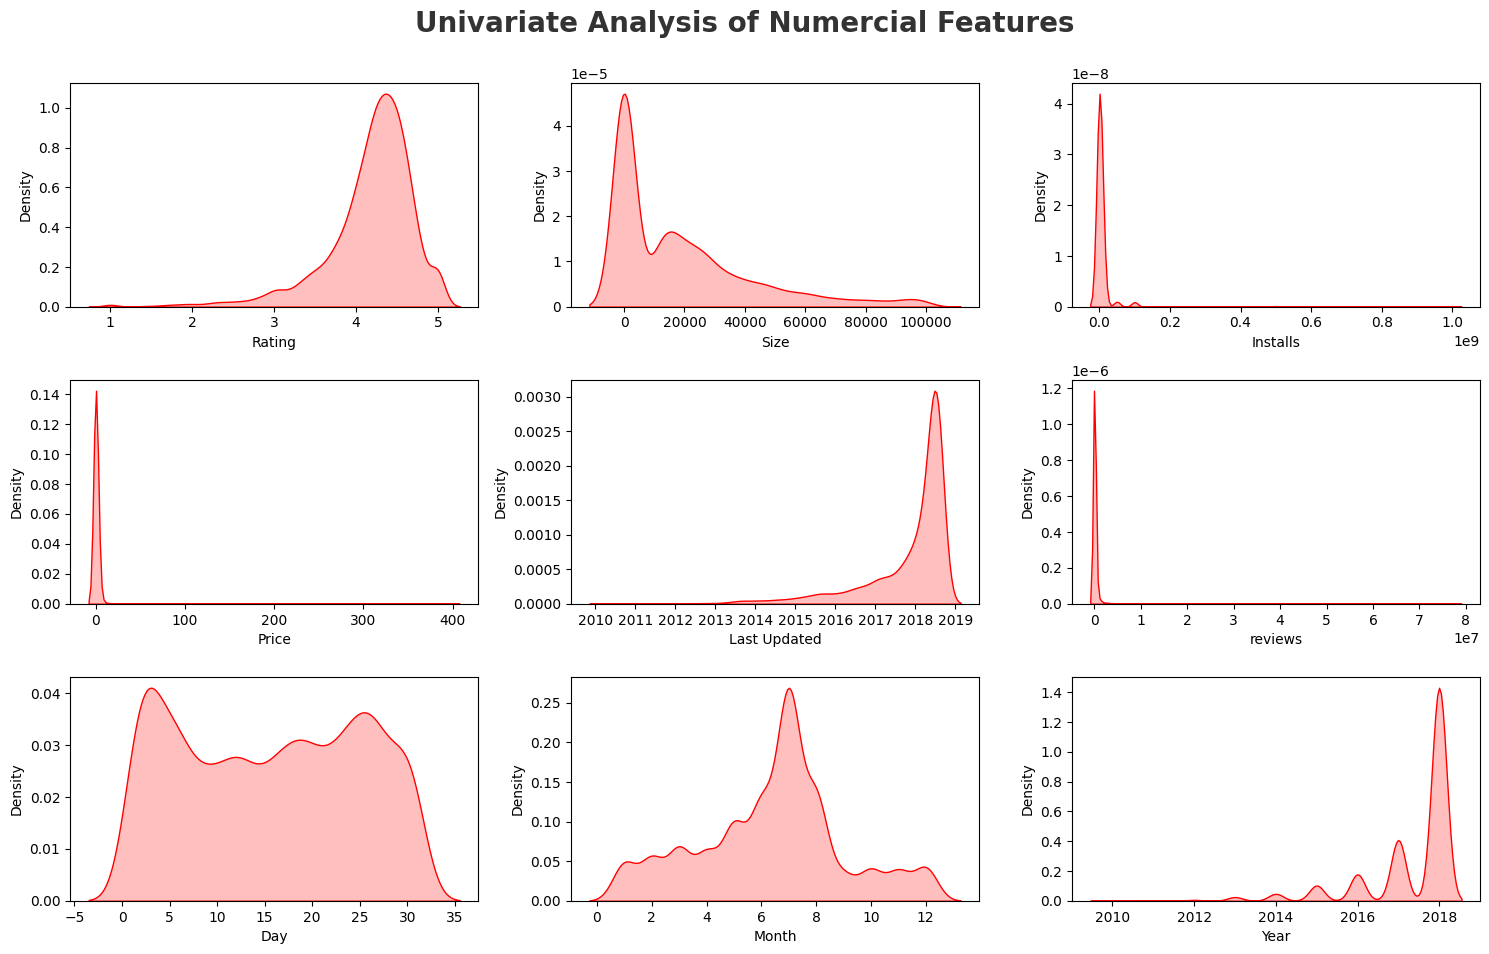

In [38]:
## proportion of count data on numerical column
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numercial Features',fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_copy[numeric_features[i]],shade=True,color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# Obserations 
rating and year is left skewed while reviews , size,installsand price are right skewed

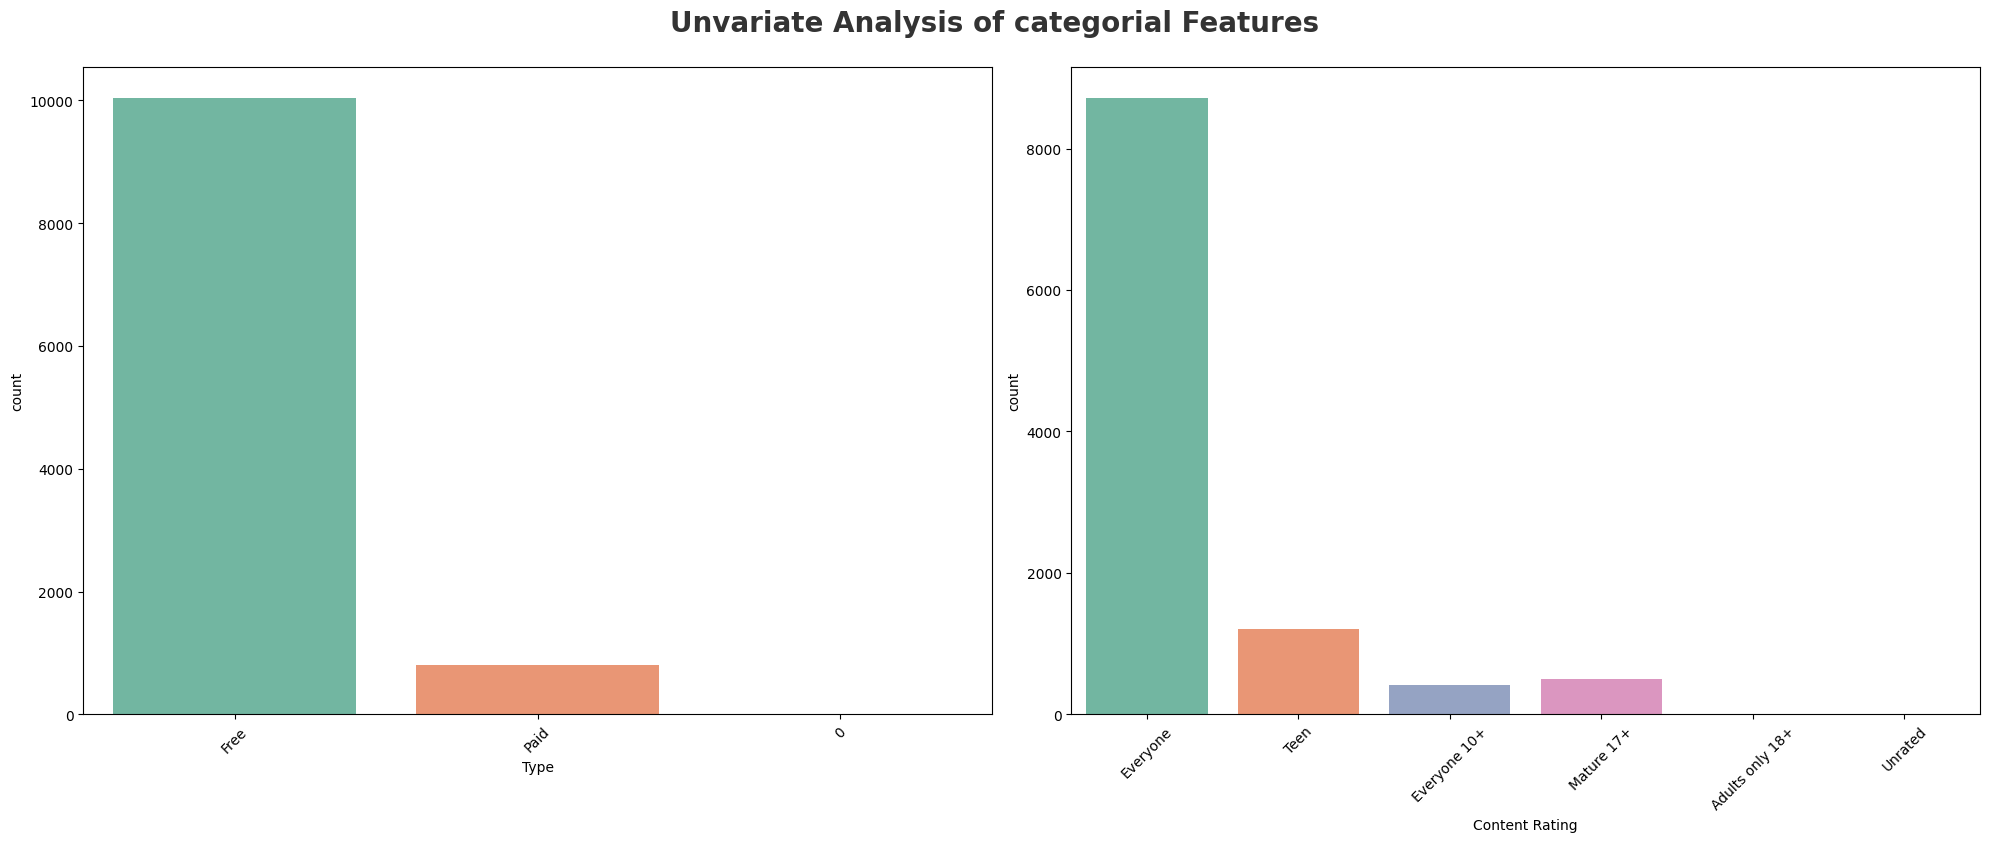

In [39]:
# Categorical columns
plt.figure(figsize=(20,15))
plt.suptitle('Unvariate Analysis of categorial Features',fontsize=20,fontweight='bold',alpha=0.8,y=1.)
category=['Type','Content Rating']
for i in range(0,len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# Obeservation
1.There are more kinds of apps in playstore which are under category of family,games and tools
2.Beauty,comics ,arts and weather kinds of apps are very less in playstore

<Axes: ylabel='count'>

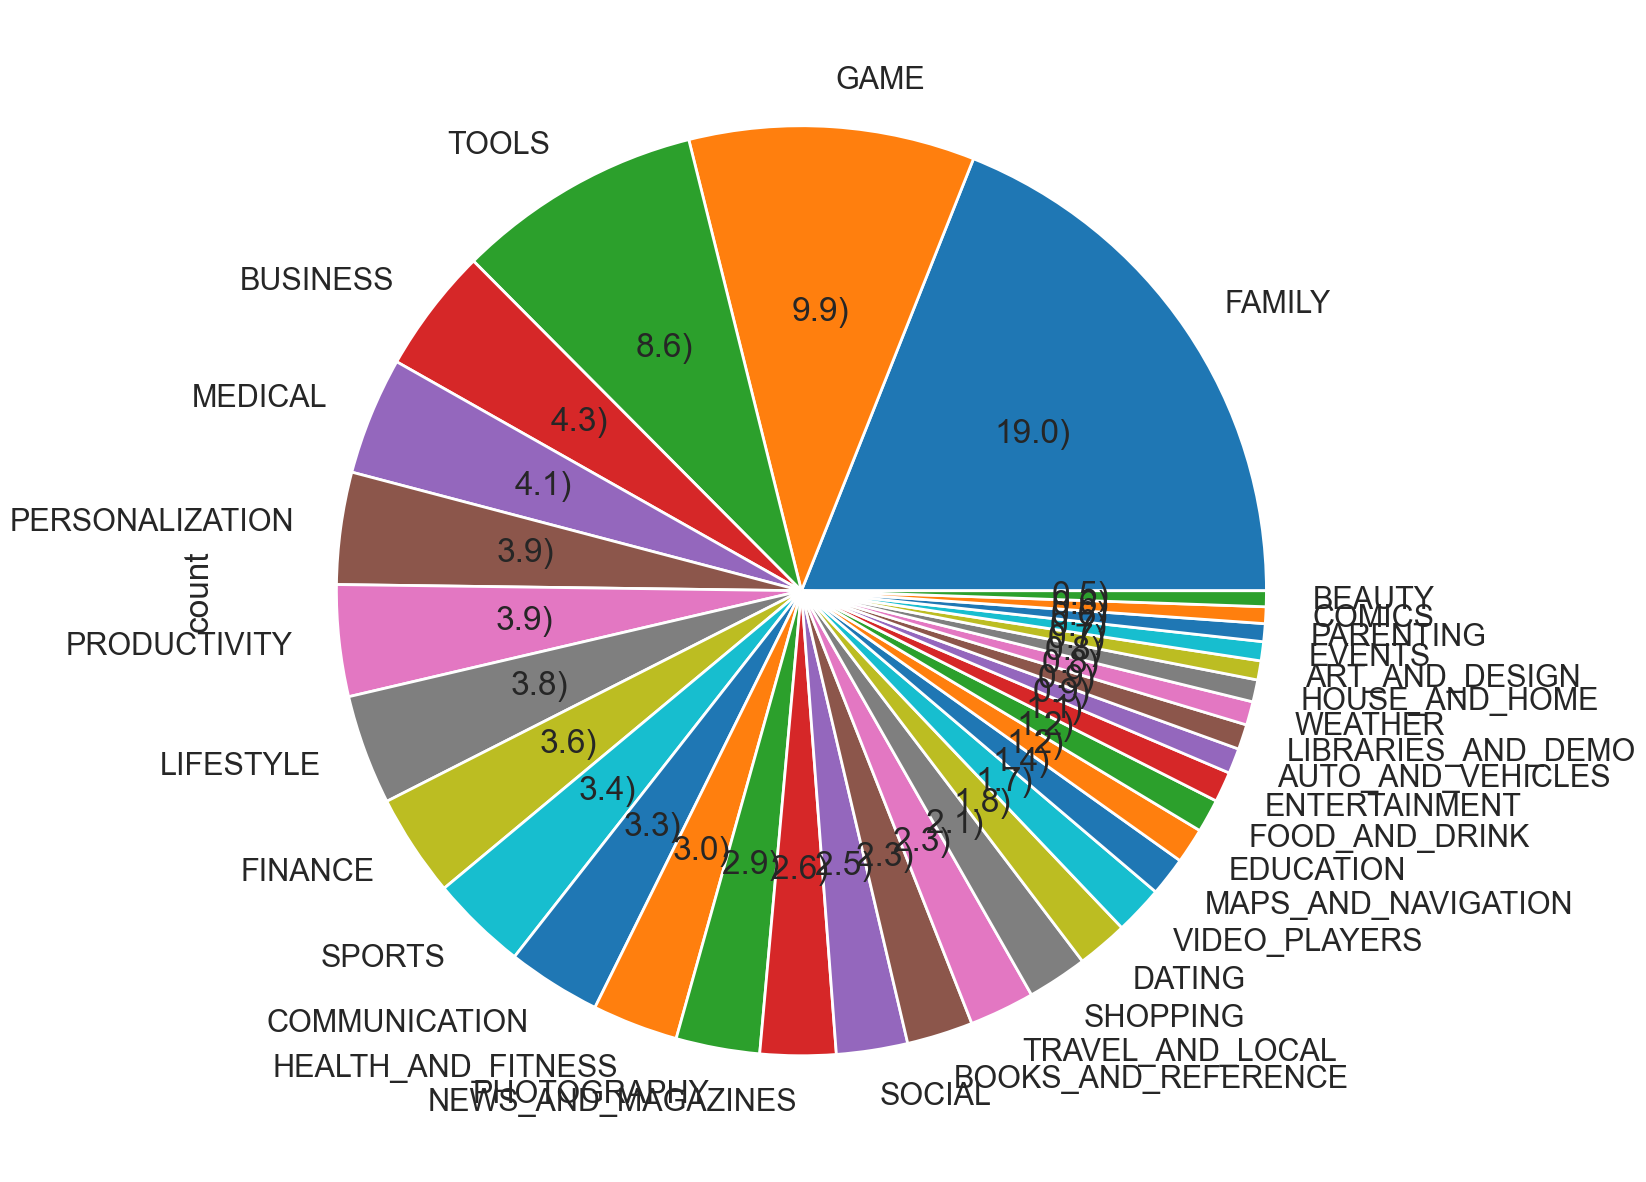

In [81]:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(15,16),autopct='%1.1f)')

In [63]:
# top 10 Apps categories
category=pd.DataFrame(df_copy['Category'].value_counts()) #Dataframe of apps on the basis of category
category.rename(columns={'Category':'Count'},inplace=True)


In [41]:
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


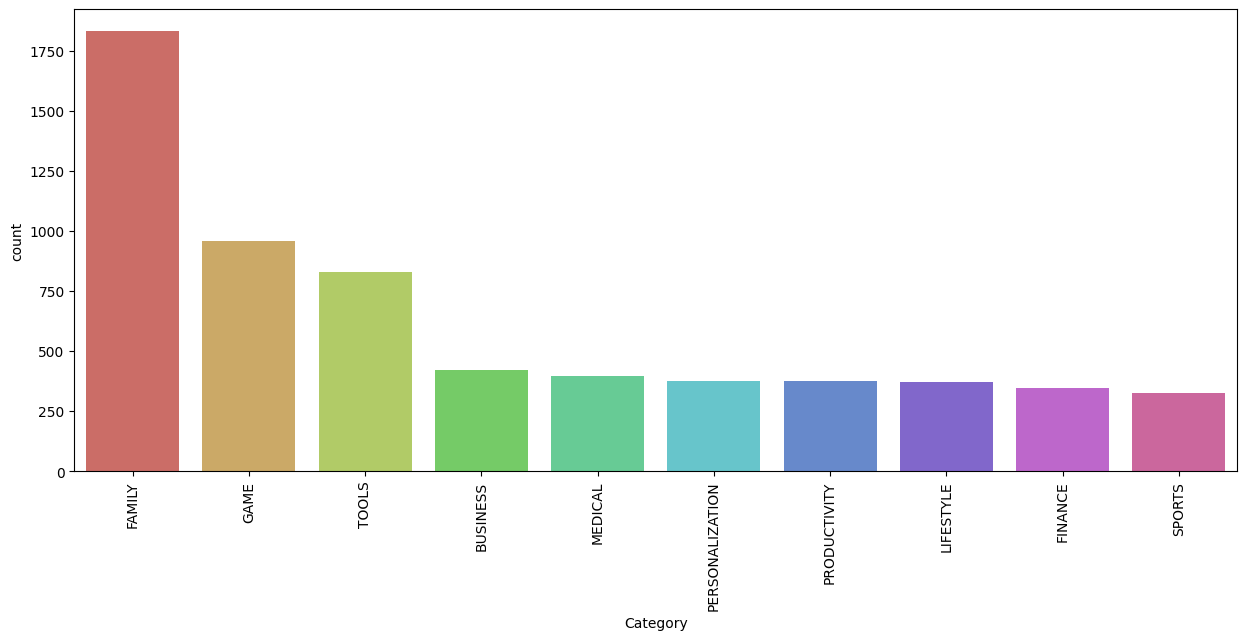

In [42]:
# Top 10 app
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10],y='count',data=category[:10],palette='hls')
plt.xticks(rotation=90)
plt.show()

## Insights
* Family Category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
    * Least number of apps belong to the beauty category with leass than 1 % of the total apps belongings to it.

# Internal Assignments
1. Which category  has the largest no. of installation ?
2. What are the top 5 most installed Apps in Each Popular Categories?
3. How many apps are there on Google play store which get 5 ratings?

## Which category has the largest no.of installation ?

Text(0.5, 1.0, 'Most Popular Categories in play Store')

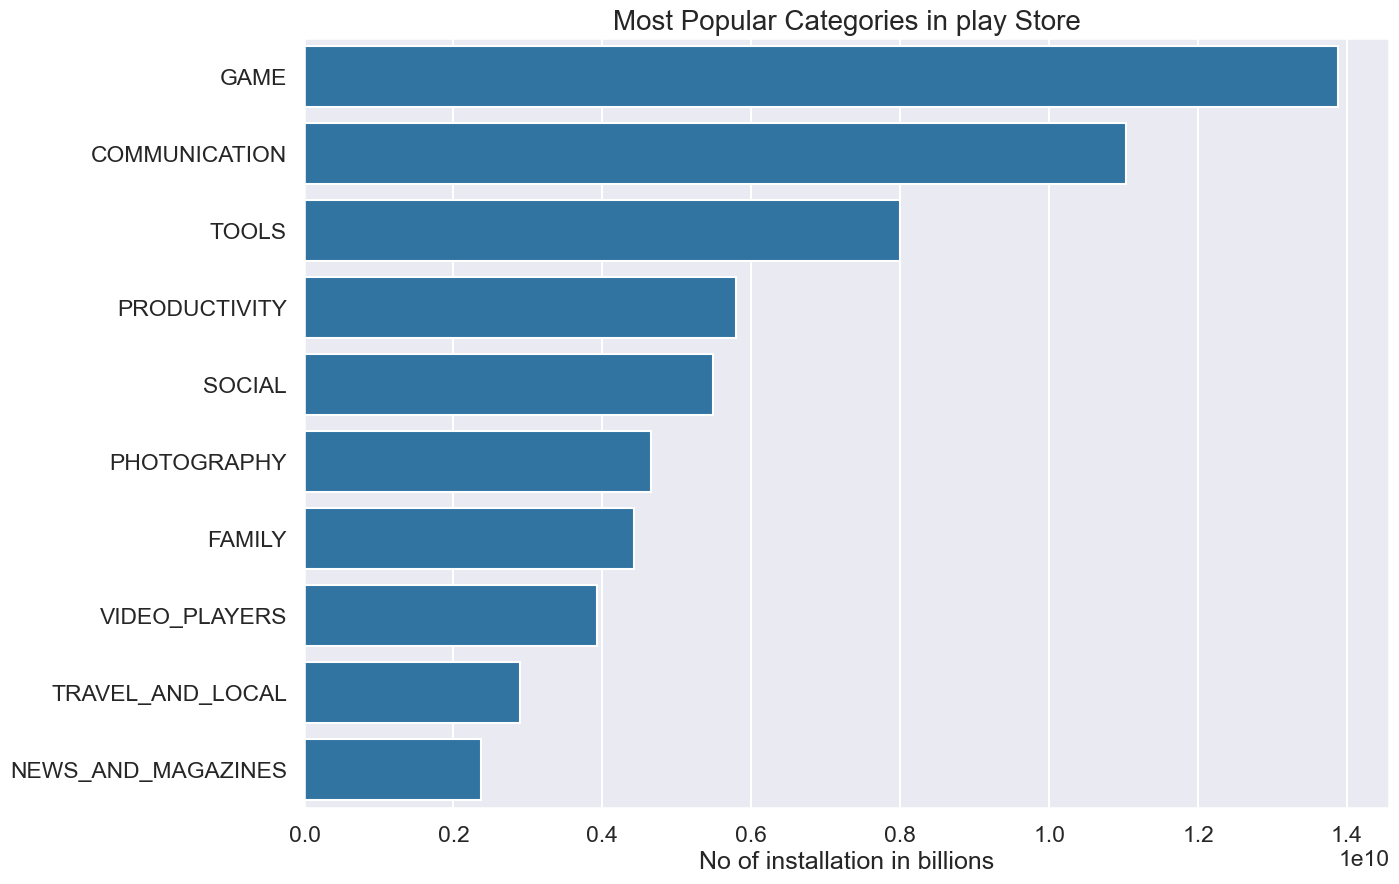

In [65]:
df_cat_installs=df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending= False).reset_index()
df_cat_installs.installs=df_cat_installs.Installs/1000000000 #converting into billions
df2=df_cat_installs.head(10)
plt.figure(figsize=(14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax=sns.barplot(x='Installs',y='Category',data=df2)
ax.set_xlabel('No of installation in billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in play Store",size=20)

# Insights
1. out of all Categories "Game"has the most number of installations.
2. with almost 35 Billion Installation Game is the most popular Category in Google App store

 ## what are the Top 5 most installed Apps in Each popular Categories 

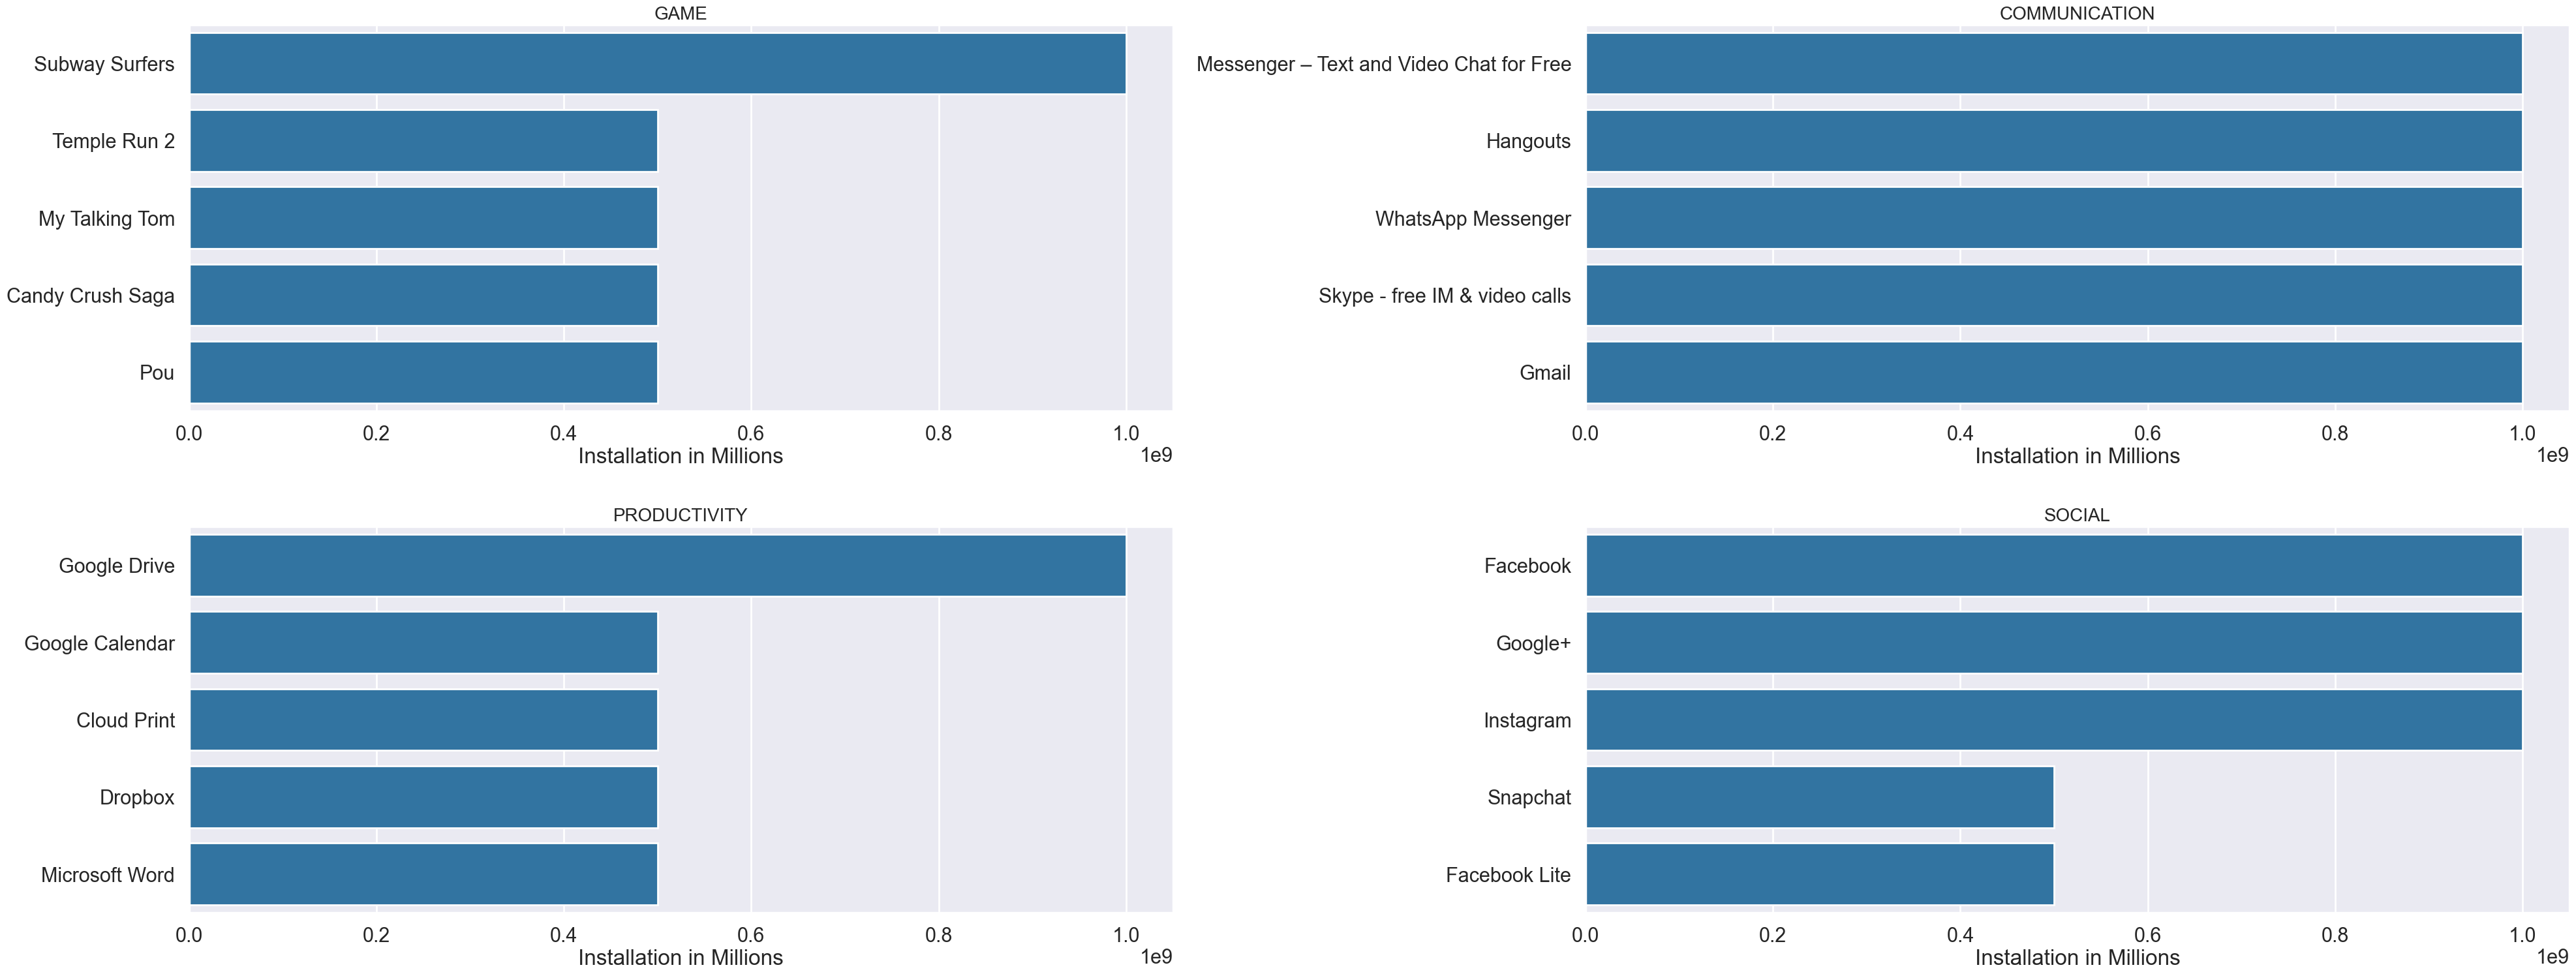

In [74]:
dfa=df_copy.groupby(['Category','App'])['Installs'].sum().reset_index()
dfa=dfa.sort_values('Installs',ascending= False)
apps=['GAME','COMMUNICATION','PRODUCTIVITY','SOCIAL']
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2=dfa[dfa.Category ==app]
    df3=df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data=df3,x="Installs",y='App')
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size=20)

plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()


# Insights
* Most popular game is Subway Sufers.
* Most Popular communication app is Hangouts.
* Most popular productivity app is Google Drive.
* Most popular social app is instagram.

## How many apps are there on Google Play Store which get 5 ratings?

In [61]:
rating=df_copy.groupby(['Category','Installs','App'])['Rating'].sum().sort_values(ascending=False).reset_index()
toprating_apps =rating[rating.Rating==5.0]
print("Number of 5 rated apps",toprating_apps.shape[0])
toprating_apps.head(1)

Number of 5 rated apps 271


,Category,Installs,App,Rating
0,FAMILY,10,USMLE Step 2 CK Flashcards,5.0


## Results
* There are 271 five rated apps on Google Play store
* Top most is 'CT Brain Interpretation from Family' category

In [62]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,reviews,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,159,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,967,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,87510,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,215644,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,967,20,6,2018
